# Assignment 5: Monte Carlo Interactions (Physics 420)

Write a simple Monte Carlo to calculate diffusion of a single argon atom in argon gas, taking the origin as the position of the atom at time t=0.  Assume the gas is at standard temperature and pressure (ie.  one mole is 22.7 liters at 100 kPa and 273 K).  Throw the energy of gas molecules according to the Maxwell Boltzmann distribution(below).  The mean free path for argon is 6.2e-6 cm at 273 K.  Treat the atoms as "hard spheres" with radius 3.67e-8 cm.  Calculate the collisions in the center of mass. For hard spheres the angle of incidence=angle of reflection, where the angle is measured between the velocity and the line from the center of the sphere to the point of impact.   

Calculate:
1.  The number of collisions/second.  (Simulate a million collisions and find the time to calculate this).  
2.  Plot the distance from the origin the atom travels as a function of time.
3.  The energy distribution of the particle as it bounces. 
4.  Redo the calculation for as many particles and as long a time as is practical on your computer.  (Limit your calculation times to a few hours).  

From Wikipedia, we find Maxwell Boltmann distribution is defined as:
Assuming the system of interest contains a large number of particles, the fraction of the particles within an infinitesimal element of three-dimensional velocity space, ${\displaystyle d^{3}v},$ centered on a velocity vector of magnitude ${\displaystyle v}$, is ${\displaystyle f(v)d^{3}v}$, in which

$${\displaystyle f(v)~\mathrm {d} ^{3}v=\left({\frac {m}{2\pi kT}}\right)^{3/2}\,e^{-{\frac {mv^{2}}{2kT}}}~\mathrm {d} ^{3}v,}$$
where ${\displaystyle m} $ is the particle mass and ${\displaystyle kT}$ is the product of Boltzmann's constant and thermodynamic temperature.


In [2]:
6.02e23/22.4e-3*5e-6**3


3359375000.000001

1.

(i) Find the number of collisions per second

Free mean path (average distance travelled by the argon atom between succesive collisions with other argon atoms): 6.2e-08 m.

Average speed of an argon atom at 100 kPa and 273 K can be determined from the Boltzmann distribution:

$$f(v) d^3v = \left(\frac{m}{2 \pi k T} \right)^{3/2} e^{-\frac{m v^2}{2 k T}} d^3v, $$

where $f(v)d^3v$ is the fraction of the particles within an infintesimal element of three-dimensional velocity space $d^3v$, centered on a velocity vector of magnitude $v$. We can look at spheres of radii $v$: $d^3v = v^2 sin(\theta) dv d\theta d\phi \rightarrow 4 \pi v^2 dv$. Then

$$f(v)d^3v = 4 \pi v^2 \left(\frac{m}{2 \pi k T} \right)^{3/2} e^{-\frac{m v^2}{2 k T}} dv.$$

Idea; determine the number of collisions per second within an infinitesimal one-dimensional element of velocity space $dv$ with the following formula. The method "follows" the argon atom between collisions, so that if we were following it with a camera, it would appear stationary; this should not alter the distribution of speeds of the other atoms significantly because our argon atom would be bombarded from all directions.

$$\rho = \frac{N f(v) d^3v}{mean-free-path} \; \; (collisions \; per \; second \; density)$$ 

(which will be different for each speed: {v, 0, $+ \infty$}), where  N is the total number of atoms. Assume that 22.7 liters of gas are at a pressure of 100 kPa. Treat the argon atoms "hard spheres" of radius 3.67e-10 m. This means that in 22.7 liters = 0.0227 m$^3$, there are approximately $N = \frac{0.0227}{\frac{4}{3} \pi (3.67e-10)^3}$ argon atoms.

Using the expression for $f(v) d^3v$ above:

$$\rho = \frac{4 \pi N v^2 \left(\frac{m}{2 \pi k T} \right)^{3/2} e^{- \frac{m v^2}{2 k T}} dv}{6.2 \times 10^{-8}} \; \; (collisions \; per \; second \; density),$$

where $m = 39.948 u = 6.6335e-26$ kg, is the mass of an argon atom.

Code:

In [3]:
# (i) Find the number of collisions per second.

import numpy as np
import matplotlib.pyplot as plt

# Assign values to variables.
m = 6.6335e-26; # kg; mass of argon atom.
k = 1.38064852e-23; # m^2 kg s^-2 K^-1; Boltzmann constant.
T = 273; # K; temperature of argon gas.
mean_free_path = 6.2e-8; # meters; average distance travelled by particle before subsequent collisions.
r = 3.67e-10; # meters; radius of argon atom according to "hard sphere" model.
V = 0.0227; #m^3; volume of the argon gas.
N = V / ((4 / 3) * np.pi * r**3); # atoms; number of argon atoms in a volume V of argon gas.

#--------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------
# COLLISIONS PER SECOND DENSITY
#--------------------------------------------------------------------------------------------------------------------------------
# Generate model.

# Boltzmann distribution.
vmax = 1500
vmin = 0
v = np.linspace(vmin, vmax, 10000); # Speeds (meters/second).
f = (m / (2 * np.pi * k * T))**(3/2) * np.exp(- (m * v**2) / (2 * k * T)); # Fraction of particles density in velocity space.

# Take a look at the Boltzmann distribution of speeds.
plt.plot(v, f)
plt.title('Boltzmann distribution of speeds')
plt.xlabel('Speed (m/sec)')
plt.ylabel('fraction of particles in volume per speed')
plt.show()

# Collisions per second density.
rho = 4 * np.pi * N * v**2 * f / mean_free_path

plt.plot(v, rho)
plt.title('Collisions per second density model')
plt.xlabel('Speed (m/sec)')
plt.ylabel('collisions/second')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Generate the Monte Carlo simulation:

Gaussian distribution formula:

$$G = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(v - v_{ave})^2}{2 {\sigma}^2}}.$$

Comparing to $f(v) = \left(\frac{m}{2 \pi k T} \right)^{3/2} e^{-\frac{m v^2}{2 k T}}$,

$$\sigma = \sqrt{\frac{k T}{m}}.$$

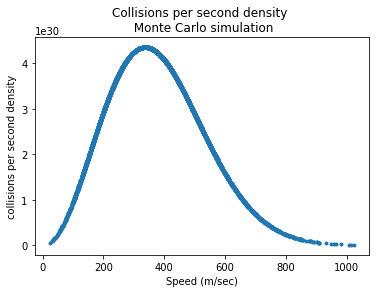

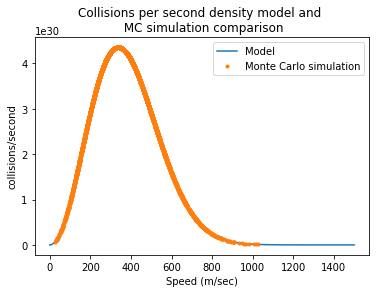

In [123]:
#--------------------------------------------------------------------------------------------------------------------------------
# Monte Carlo simulation for collision per second density.

# Define fraction of particles density in velocity space.
def f(v):
    f = (m / (2 * np.pi * k * T))**(3/2) * np.exp(- (m * v**2) / (2 * k * T));
    return f

rhoMC = []; # List to store collisions per second density.

sigma = np.sqrt(k * T / m);

# Generate velocities and speeds for Monte Carlo simulation.
vx = np.random.normal(0, sigma, 5000);
vy = np.random.normal(0, sigma, 5000);
vz = np.random.normal(0, sigma, 5000);

vMC = np.sqrt(vx**2 + vy**2 + vz**2)

for i in range(0, len(vMC)):
    rhoMC.append(4 * np.pi * N * vMC[i]**2 * f(vMC[i]) / mean_free_path) # Actualize dictionary for collisions per second density.


# Plot graph of collisions per second density.
plt.plot(vMC, rhoMC, '.')
plt.title('Collisions per second density \n Monte Carlo simulation')
plt.xlabel('Speed (m/sec)')
plt.ylabel('collisions per second density')
plt.show()

#--------------------------------------------------------------------------------------------------------------------------------
# Compare simulation with model above.
plt.plot(v, rho) # Model.
plt.plot(vMC, rhoMC, '.') # Monte Carlo simulation.

plt.title('Collisions per second density model and \n MC simulation comparison')
plt.xlabel('Speed (m/sec)')
plt.ylabel('collisions/second')

labels = ['Model', 'Monte Carlo simulation']
plt.legend(labels)

plt.show()

To find the collisions/second, integrate $\rho$ (the collisions per second density), to get the collisions per second as a function of the speed of the incoming particle:

$$collisions/second = \int \rho = \int \frac{4 \pi N v^2 \left(\frac{m}{2 \pi k T} \right)^{3/2} e^{- \frac{m v^2}{2 k T}} dv}{6.2 \times 10^{-8}}.$$

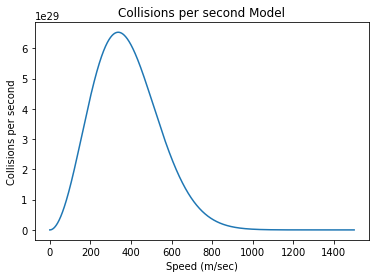

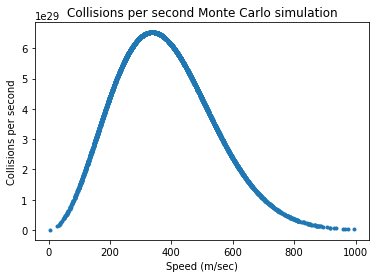

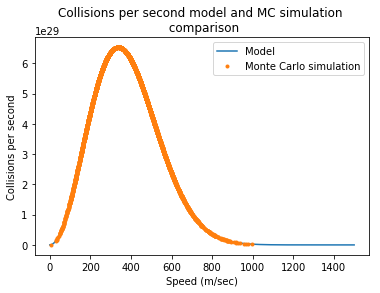

In [5]:
#--------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------
# COLLISIONS PER SECOND
#--------------------------------------------------------------------------------------------------------------------------------
# Model.

collpersec = [] # List to store collisions per second.
collpersec_cummulative = 0

import scipy.integrate as integrate

for i in range(0, len(v)):
    # Actualize list of collisions per second.
    if i == 0:
        collpersec.append(integrate.quad(lambda u: 4 * np.pi * N * u**2 * f(u) / mean_free_path, 0, v[i])[0]) 
        
    else:
        # We don't want the cummulative collisions per second, we want the collisions per second as a function of speed.
        collpersec_cummulative = integrate.quad(lambda u: 4 * np.pi * N * u**2 * f(u) / mean_free_path, 0, v[i-1])[0]
        collpersec.append(integrate.quad(lambda u: 4 * np.pi * N * u**2 * f(u) / mean_free_path, 0, v[i])[0] - collpersec_cummulative)

# Plot graph of collisions per second.        
plt.plot(v, collpersec)
plt.title('Collisions per second Model')
plt.xlabel('Speed (m/sec)')
plt.ylabel('Collisions per second')
plt.show()

#--------------------------------------------------------------------------------------------------------------------------------
# Monte Carlo simulation.

collpersecMC = [] # List to store collisions per second in Monte Carlo Simulation.
collpersecMC_cummulative = 0

step = (vmax - vmin)/10000

for i in range(0, len(vMC)):
    # Same as before, we don't want the cummulative collisions per second, we want the collisions per second as a function 
    # of speed.
    collpersecMC_cummulative = integrate.quad(lambda u: 4 * np.pi * N * u**2 * f(u) / mean_free_path, 0, (vMC[i]-step))[0]
    collpersecMC.append(integrate.quad(lambda u: 4 * np.pi * N * u**2 * f(u) / mean_free_path, 0, vMC[i])[0] - collpersecMC_cummulative)
    
# Plot graph of collisions per second.
plt.plot(vMC, collpersecMC, '.')
plt.title('Collisions per second Monte Carlo simulation')
plt.xlabel('Speed (m/sec)')
plt.ylabel('Collisions per second')
plt.show()

#--------------------------------------------------------------------------------------------------------------------------------
# Compare model to MC simulation.

plt.plot(v, collpersec) # Model.
plt.plot(vMC, collpersecMC, '.') # MC simulation.

plt.title('Collisions per second model and MC simulation \n comparison')
plt.xlabel('Speed (m/sec)')
plt.ylabel('Collisions per second')

lables = ['Model', 'Monte Carlo simulation']
plt.legend(labels)

plt.show()

(ii) Simulate a million collisions and find the time to calculate this simulation.



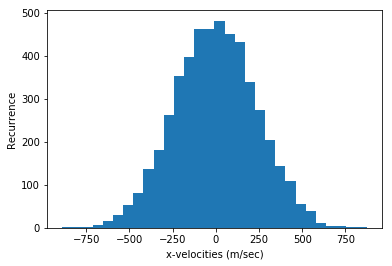

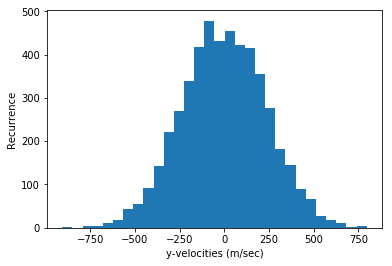

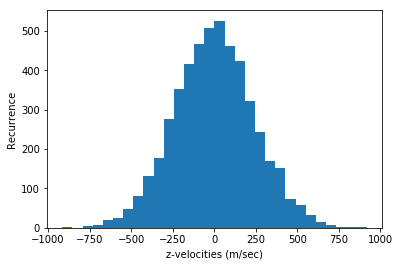

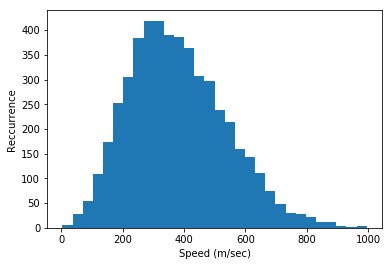

In [6]:
# Take a look at the distribution of speeds.
vcomponents = [vx, vy, vz]
vcomponents_names = ['x', 'y', 'z']

for i in range(0, len(vcomponents)):
    plt.hist(vcomponents[i], bins = 30)
    plt.xlabel(str(vcomponents_names[i]) + '-velocities (m/sec)')
    plt.ylabel('Recurrence')
    plt.show()

plt.hist(vMC, bins = 30)
plt.xlabel('Speed (m/sec)')
plt.ylabel('Reccurrence')
plt.show()

Generate a random speed $v_{MC}$ of an atom colliding with our argon atom using the Monte Carlo method. Then find the rate of collisions corresponding to this speed, from which one can find the time for which a million collisions will happen (assume there is only one collision at a time):

$$time = \frac{mean-free-path}{v_{MC}},$$

where $``collisions \; per \; second"$ is a function of the Monte Carlo speed $v_{MC}$.

For every run of the loop, add one collision.

In [39]:
# Monte Carlo simulation for one million collisions.
import time

# Save numbers in a separate file (it takes a while to run a million iterations).

collisions = 0 # To store cummulative collisons.
Time = 0 # To store cummulative time.

# Generate a million speeds for Monte Carlo simulation.
vxMC = np.random.normal(0, sigma, 1000000);
vyMC = np.random.normal(0, sigma, 1000000);
vzMC = np.random.normal(0, sigma, 1000000);

vMC = np.sqrt(vxMC**2 + vyMC**2 + vzMC**2)

for i in range(0, len(vMC)):
    collisions += 1  # Accumulate collisions.
    
    Time_dummy = mean_free_path / vMC[i]
    Time += Time_dummy # Accumulate time.
    
    if collisions/1000000 == 1: # Stop for one million collisions (not necessary, but makes things clearer).
        Time_total = Time
            
        print('Number of collisions:', collisions)
        print('Total time for one million collisions to occur (seconds):', "%.3e"% float(Time_total))
        print('Execution time (seconds):', "%.3f" % float(time.time() * 10**(-9)))

Number of collisions: 1000000
Total time for one million collisions to occur (seconds): 2.075e-04
Execution time (seconds): 1.576


2. Plot the distance from the origin the atom travels as a function of time.

Let our argon atom be sphere A (I will focus on the trajectory of this sphere) and the incoming argon atom, sphere B. The center of mass between the two argon atoms at the moment of collision is the point of contact between them; let the center of mass be a moveable origin O' of a moveable coordinate system S'. There is a stationary coordinate system S with an origin O.

Let the initial velocities of the two argon atoms in the stationary coordinate system S be ${\bf{v_{A0}}}$ and ${\bf{v_{B0}}}$. Then the velocity of the argon atom B in the reference frame of the argon atom A is: ${\bf{v_0}} = {\bf{v_{B0}}} - {\bf{v_{A0}}}$. In the frame of the argon atom A, the angle of incidence of the atom B is equal to its angle of reflection, call it $\theta$, and $\theta$ is the angle in between the velocity $\bf{v_0}$ and the vector $\bf{r}$ from the center of mass (point of collision) to the center of the atom A.

The scattering angles between two hard spheres sum 90 degrees. Because of this symmetry and because the atoms have the same masses, assuming the collisions are perfectly elastic, only the components of the atom A and B that have correspondingly opposite signs are changed; what if they swap these components?

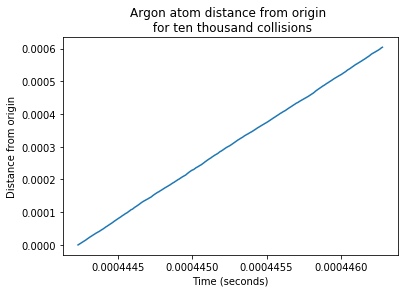

In [121]:
# Save data on a different file (just to make the code faster).

"""
file1 = open('positionVectorAtomA.txt', 'w') # To store position vectors of atom A.
file2 = open('timeTotal.txt.', 'w') # To store the total (cummulative) time.
file3 = open('distanceFromOrigin.txt', 'w') # To store the distances of atom A from the origin.
file4 = open('TenergyAtomA.txt', 'w')    # To store the kinetic energies of atom A.

# Because vA0 and vAf will be alternating throughout the code for ten thousand collisions (I didn't have the time to run it 
# for one million collisions), I will work with vA only.

# Generate initial velocity for atom A.
vAx = np.random.normal(0, sigma, 1)
vAy = np.random.normal(0, sigma, 1)
vAz = np.random.normal(0, sigma, 1)

vA = [vAx0, vAy0, vAz0]
vA_magnitude = np.linalg.norm(vA)
TenergyAtomA = 0.5 * m * vA_magnitude**2 # Initial kinetic energy of atom A.

rA = [0, 0, 0] # Position vector of atom A.

time = 0

for i in range(0, 10000):
    
    # Generate initial velocity for atom B.
    vB0 = [vxMC[i], vyMC[i], vzMC[i]]
    
    for j in range(0, 3):
        # Swap opposite corresponding components with opposite sign (change the sign).
        if vA[j] * vB0[j] < 0:
            vA[j] = -vB0[j]
        
        else:
            vA[j] = vA[j]
    
    vA_magnitude = np.linalg.norm(vA)
    TenergyAtomA = 0.5 * m * vA_magnitude**2 # Kinetic energy of atom A.
    
    # Assume the first collision occurs at the origin. Afterwards, take into account the time between collisions. In between
    # collisions, the atom A will keep its (new) velocity unaltered.
    
    if i > 0:
        vB0_magnitude = vMC[i]
        
        time_displacementA = mean_free_path / vB0_magnitude    
       
        # Actualize total time.
        Time_total += time_displacementA
        
        
        # Acutalize coordinates of atom A.
        rA[0] += time_displacementA * vA[0]
        rA[1] += time_displacementA * vA[1]
        rA[2] += time_displacementA * vA[2]
        
        distance_from_origin = np.linalg.norm(rA)
        
        # Write data on files.
        file1.write(str(rA) + '\n')
        file2.write(str(Time_total) + '\n')
        file3.write(str(distance_from_origin) + '\n')
        file4.write(str(TenergyAtomA) + '\n')

file1.close()
file2.close()
file3.close()
file4.close()
"""

# Bring data saved in supressed block above.
timeTotal = np.loadtxt('timeTotal.txt', dtype = 'float', delimiter = ',')
distanceFromOrigin = np.loadtxt('distanceFromOrigin.txt', dtype = 'float', delimiter = ',')

# Plot the distance of atom A has travelled from the origin as a function of time.
plt.plot(timeTotal, distanceFromOrigin)
plt.title('Argon atom distance from origin \n for ten thousand collisions')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance from origin')
plt.show()

3. Plot energy distribution of the particle as it bounces.

Plot the kinetic energy through time.


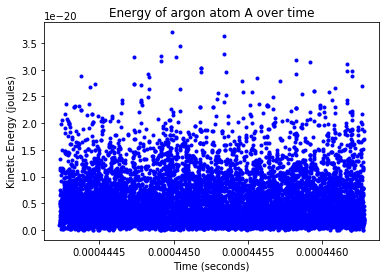

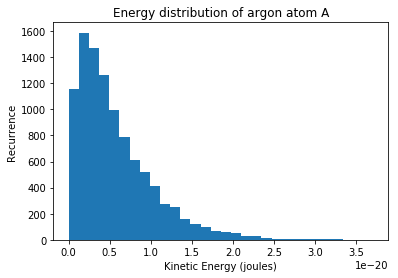

In [122]:
# Import data.

TenergyAtomA = np.loadtxt('TenergyAtomA.txt', dtype = 'float', delimiter = ',')

# Plot the kinetic energy of atom A over time.
plt.plot(timeTotal, TenergyAtomA, 'b.')
plt.title('Energy of argon atom A over time')
plt.xlabel('Time (seconds)')
plt.ylabel('Kinetic Energy (joules)')
plt.show()

# Plot the kinetic energy distribution.
plt.hist(TenergyAtomA, bins = 30);
plt.title('Energy distribution of argon atom A')
plt.xlabel('Kinetic Energy (joules)')
plt.ylabel('Recurrence')
plt.show()

4. Redo the calculation for as many particles and as long a time as is practical on your computer. (Limit your calculation times to a few hours).